### Были построены следующие модели с помощью линейной регрессии:
* Модель на основе свойств 'GarageArea','LotArea','YearBuilt', которые были масштабируемы соответствующим образом (StandardScaler, MinMaxScaler). Выбор способа трансформации данных был обусловлен видом гистограммы распределения (похоже на нормальное или нет). При этом SalePrice была обработана с помощью MinMaxScaler.
* Во второй модели все свойства от предыдущей модели были сохранены, но была изменена обработка SalePrice. MinMaxScaler не применялся, вместо этого от каждого значения был взят логарифм.
* Модель на основе свойств: 'GarageArea','LotArea', 'Neighborhood'. 'SalePrice' в шкале MinMax
* Модель на основе свойств: 'GarageArea','YearRemodAdd', 'Neighborhood'.'SalePrice' в шкале MinMax
* Модель на основе свойств 'GarageArea','LotArea','YearBuilt'. Были удалены выбросы в полях 'GarageArea','LotArea'. (Числа, выходящие за пределы доверительного интервала были заменены средним значением)

In [76]:
# импорт библиотек
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, Imputer
from sklearn.model_selection import KFold


In [78]:
# Файлы были загружены с Kaggle. Чтение
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.options.display.max_columns = 200


## Предварительный просмотр данных

In [79]:
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Id: 1460
MSSubClass: 15
LotFrontage: 110
LotArea: 1073
Neighborhood: 25
OverallQual: 10
YearBuilt: 112
YearRemodAdd: 61
Exterior1st: 15
Exterior2nd: 16
MasVnrArea: 327
BsmtFinSF1: 637
BsmtFinSF2: 144
BsmtUnfSF: 780
TotalBsmtSF: 721
1stFlrSF: 753
2ndFlrSF: 417
LowQualFinSF: 24
GrLivArea: 861
TotRmsAbvGrd: 12
GarageYrBlt: 97
GarageArea: 441
WoodDeckSF: 274
OpenPorchSF: 202
EnclosedPorch: 120
3SsnPorch: 20
ScreenPorch: 76
MiscVal: 21
MoSold: 12
SalePrice: 663


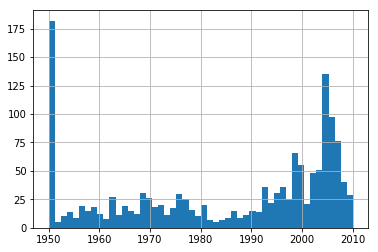

In [80]:
uniq=pd.DataFrame(train.nunique())
uniq
for el in uniq.index:
    if uniq[0][el] > 9:
        print('{}: {}'.format(el,uniq[0][el]))

              
train['YearRemodAdd'].value_counts()
train['YearRemodAdd'].hist(bins=50)


In [81]:
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Модель 1
На основе свойств 'GarageArea','LotArea','YearBuilt', которые были масштабируемы соответствующим образом (StandardScaler, MinMaxScaler). Выбор способа трансформации данных был обусловлен видом гистограммы распределения (похоже на нормальное или нет). При этом SalePrice была обработана с помощью MinMaxScaler.

In [82]:
# Препроцессинг
# Удаление столбцов с большим числом NaN
total_NaN = train.isna().sum()
drop_column = total_NaN[total_NaN>train.shape[0]/4]
for drop in drop_column.index:
    del train[drop]
    del test[drop]
# Обработка колонки 'GarageArea': замена NaN на 1, нормализация данных.
train['GarageArea']=train['GarageArea'].fillna(1)
test['GarageArea']=test['GarageArea'].fillna(1)
scaler = StandardScaler()
train['GarageArea_scal'] = scaler.fit_transform(train[['GarageArea']])
test['GarageArea_scal'] = scaler.transform(test[['GarageArea']])

#Обработка колонки 'SalePrice': масштабирование данных.
scaler2=MinMaxScaler()
train['SalePrice_scal'] = scaler2.fit_transform(train[['SalePrice']])

#Обработка колонки 'YearBuilt_scal': масштабирование данных.
train['YearBuilt_scal'] = scaler2.fit_transform(train[['YearBuilt']])
test['YearBuilt_scal'] = scaler2.transform(test[['YearBuilt']])

#Обработка колонки 'LotArea_scal': нормализация данных.
train['LotArea_scal']=scaler.fit_transform(train[['LotArea']])
test['LotArea_scal']=scaler.transform(test[['LotArea']])




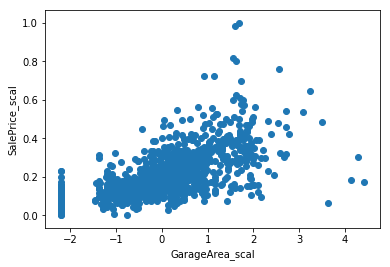

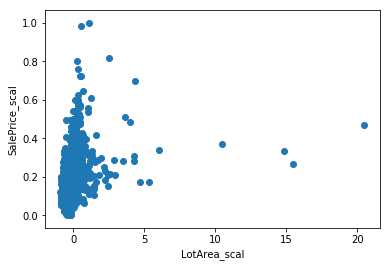

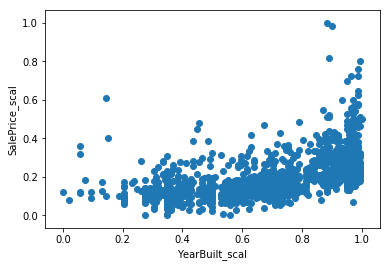

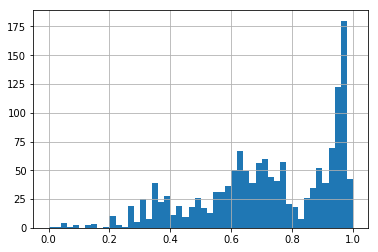

In [83]:
# Визуализация данных.Попытка рассмотреть, есть ли вообще какая-либо зависимость между ценой
# и выбранными нами свойствами. Корреляция присутствует. 
y_name = 'SalePrice_scal'


plt.scatter(train['GarageArea_scal'],train[y_name])
plt.xlabel('GarageArea_scal')
plt.ylabel(y_name)
plt.show()


plt.scatter(train['LotArea_scal'],train[y_name])
plt.xlabel('LotArea_scal')
plt.ylabel(y_name)
plt.show()

plt.scatter(train['YearBuilt_scal'],train[y_name])
plt.xlabel('YearBuilt_scal')
plt.ylabel(y_name)
plt.show()
train['YearBuilt_scal'].hist(bins=50)

In [84]:
#### Построение модели на основе 'GarageArea_scal','LotArea_scal','YearBuilt_scal'
features = ['GarageArea_scal','LotArea_scal','YearBuilt_scal'] # Данные для тренировки модели
kf = KFold(n_splits=5)
model = LinearRegression()
rmse_list = []
# кросс-валидация
for i,(train_ind,test_ind) in enumerate(kf.split(train)):
    x_train,x_test = train.loc[train_ind,features], train.loc[test_ind,features]
    y_train,y_test = train.loc[train_ind,['SalePrice_scal']], train.loc[test_ind,['SalePrice_scal']]
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print( 'koeff='+' '.join([str(x) for x in model.coef_[0]])+'\n'+'intercept='+str(model.intercept_[0]))
    print('rmse {}: {}'.format(i+1,rmse))

rmse_mean1 = np.mean(rmse_list)
print('mean rmse: '+str(rmse_mean1))
prediction = model.predict(test[features])
output = pd.DataFrame()
output['Id'] = test['Id']
maxim=train['SalePrice'].max()
minim=train['SalePrice'].min()
output['SalePrice'] = prediction*(maxim-minim)+minim
output.head()
output.to_csv('submission_1.csv', index = None)
values_kaggle=[]

koeff=0.04763041648755747 0.01941133433056515 0.16231140908821032
intercept=0.08560333244749833
rmse 1: 0.06994168869830153
koeff=0.045711328860595986 0.028832845417228612 0.15839653341213075
intercept=0.08827970987463367
rmse 2: 0.08028038785257545
koeff=0.04743359587493733 0.017246519235741588 0.153322671374528
intercept=0.09208305788051478
rmse 3: 0.08712706211708811
koeff=0.05204300367241468 0.018076820687675868 0.14900739216431003
intercept=0.09780047304321482
rmse 4: 0.07366930390281089
koeff=0.05102175050526033 0.019848767130365815 0.1541786077057785
intercept=0.09139635203775856
rmse 5: 0.0885540212250591
mean rmse: 0.07991449275916702


In [85]:
output.head()

,Id,SalePrice
0,1461,218082.172204
1,1462,147602.739815
2,1463,207576.334734
3,1464,200800.114392
4,1465,195037.694569


## Модель 2
Все свойства предыдущей модели были сохранены, но была изменена обработка SalePrice. MinMaxScaler не применялся, вместо этого от каждого значения SalePrice был взят логарифм.

In [86]:
train['SalePrice_log'] = np.log(train['SalePrice']+1)

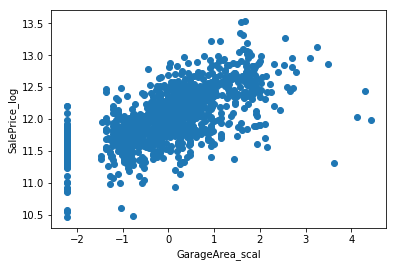

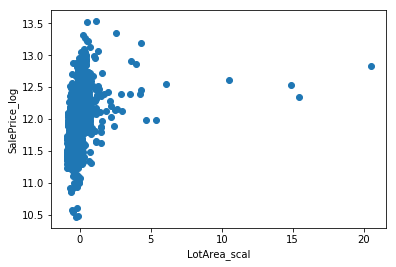

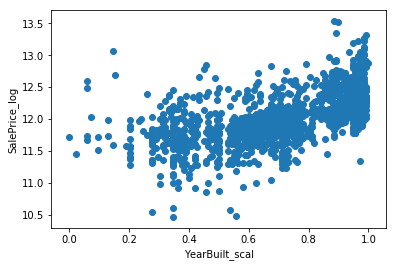

In [87]:
# Визуализация данных.Попытка рассмотреть, есть ли вообще какая-либо зависимость между ценой
# и выбранными нами свойствами. Корреляция присутствует. 
y_name = 'SalePrice_log'

plt.scatter(train['GarageArea_scal'],train[y_name])
plt.xlabel('GarageArea_scal')
plt.ylabel(y_name)
plt.show()


plt.scatter(train['LotArea_scal'],train[y_name])
plt.xlabel('LotArea_scal')
plt.ylabel(y_name)
plt.show()

plt.scatter(train['YearBuilt_scal'],train[y_name])
plt.xlabel('YearBuilt_scal')
plt.ylabel(y_name)
plt.show()

In [88]:
#### Построение модели на основе 'GarageArea_scal','LotArea_scal','YearBuilt_scal'
features = ['GarageArea_scal','LotArea_scal','YearBuilt_scal'] # Данные для тренировки модели
kf = KFold(n_splits=5)
model = LinearRegression()
rmse_list = []
# кросс-валидация
for i,(train_ind,test_ind) in enumerate(kf.split(train)):
    x_train,x_test = train.loc[train_ind,features], train.loc[test_ind,features]
    y_train,y_test = train.loc[train_ind,['SalePrice_log']], train.loc[test_ind,['SalePrice_log']]
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print('rmse {}: {}'.format(i+1,rmse))

rmse_mean2 = np.mean(rmse_list)
print('mean rmse: '+str(rmse_mean2))
prediction = model.predict(test[features])
output = pd.DataFrame()
output['Id'] = test['Id']
output['SalePrice'] =np.exp(prediction)-1
output.head()
output.to_csv('submission_2.csv', index = None)

rmse 1: 0.24664052468655948
rmse 2: 0.28734068125618806
rmse 3: 0.273265975050759
rmse 4: 0.2678814775128956
rmse 5: 0.27972874473275466
mean rmse: 0.27097148064783133


In [89]:
output.head()

,Id,SalePrice
0,1461,198387.026704
1,1462,139255.984448
2,1463,194953.777243
3,1464,188796.665060
4,1465,182539.961253


## Модель 3
на основе свойств: 'GarageArea','LotArea', 'Neighborhood'.
'SalePrice' в шкале MinMax

In [90]:
encoder = LabelEncoder()
train['Neighborhood_num'] = train['Neighborhood'].copy()
test['Neighborhood_num'] = test['Neighborhood'].copy()
encoder.fit(train['Neighborhood_num'])
train['Neighborhood_num'] = encoder.transform(train['Neighborhood_num'])
test['Neighborhood_num'] = encoder.transform(test['Neighborhood_num'])
scaler2 = MinMaxScaler()
train['Neighborhood_num_scal'] = scaler2.fit_transform(train[['Neighborhood_num']])
test['Neighborhood_num_scal'] = scaler2.transform(test[['Neighborhood_num']])
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageArea_scal,SalePrice_scal,YearBuilt_scal,LotArea_scal,SalePrice_log,Neighborhood_num,Neighborhood_num_scal
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0.351000,0.241078,0.949275,-0.207142,12.247699,5,0.208333
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,-0.060731,0.203583,0.753623,-0.091886,12.109016,24,1.000000
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0.631726,0.261908,0.934783,0.073480,12.317171,5,0.208333
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0.790804,0.145952,0.311594,-0.096897,11.849405,6,0.250000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1.698485,0.298709,0.927536,0.375148,12.429220,15,0.625000


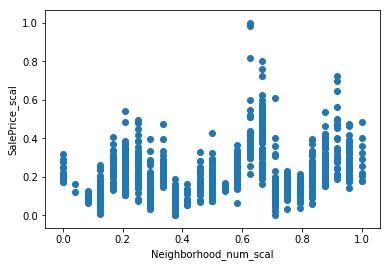

In [91]:
# Визуализация данных.Попытка рассмотреть, есть ли вообще какая-либо зависимость между ценой
# и выбранными нами свойствами. Корреляция слабая. 
y_name = 'SalePrice_scal'

plt.scatter(train['Neighborhood_num_scal'],train[y_name])
plt.xlabel('Neighborhood_num_scal')
plt.ylabel(y_name)
plt.show()

In [92]:
#### Построение модели на основе 'GarageArea_scal','LotArea_scal', 'Neighborhood_num_scal'
features = ['GarageArea_scal','LotArea_scal','Neighborhood_num_scal'] # Данные для тренировки модели
kf = KFold(n_splits=5)
model = LinearRegression()
rmse_list = []
# кросс-валидация
for i,(train_ind,test_ind) in enumerate(kf.split(train)):
    x_train,x_test = train.loc[train_ind,features], train.loc[test_ind,features]
    y_train,y_test = train.loc[train_ind,['SalePrice_scal']], train.loc[test_ind,['SalePrice_scal']]
    model.fit(x_train,y_train)
    #print( model.coef_, model.intercept_)
    predict = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print('rmse {}: {}'.format(i+1,rmse))
rmse_mean3 = np.mean(rmse_list)
print('mean rmse: '+str(rmse_mean3))
prediction = model.predict(test[features])
output = pd.DataFrame()
output['Id'] = test['Id']
maxim=train['SalePrice'].max()
minim=train['SalePrice'].min()
output['SalePrice'] = prediction*(maxim-minim)+minim
output.head()
output.to_csv('submission_3.csv', index = None)

rmse 1: 0.07308617450579584
rmse 2: 0.08305530823026301
rmse 3: 0.09192900534332293
rmse 4: 0.08046092552883026
rmse 5: 0.09449905040142338
mean rmse: 0.08460609280192707


## Модель 4 
Модель на основе свойств: 'GarageArea','YearRemodAdd', 'Neighborhood'.
'SalePrice' в шкале MinMax

In [93]:
train['YearRemodAdd_scal'] = scaler2.fit_transform(train[['YearRemodAdd']])
test['YearRemodAdd_scal'] = scaler2.transform(test[['YearRemodAdd']])

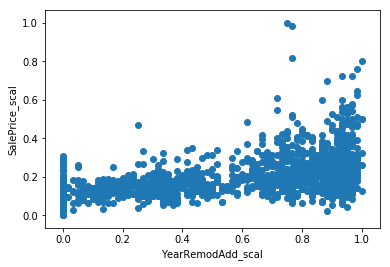

In [94]:
# Визуализация данных.Попытка рассмотреть, есть ли вообще какая-либо зависимость между ценой
# и выбранными нами свойствами. Корреляция . 
y_name = 'SalePrice_scal'

plt.scatter(train['YearRemodAdd_scal'],train[y_name])
plt.xlabel('YearRemodAdd_scal')
plt.ylabel(y_name)
plt.show()

In [95]:
#### Построение модели на основе 'GarageArea_scal','YearRemodAdd', 'Neighborhood_num_scal'
features = ['GarageArea_scal','YearRemodAdd','Neighborhood_num_scal'] # Данные для тренировки модели
kf = KFold(n_splits=5)
model = LinearRegression()
rmse_list = []
# кросс-валидация
for i,(train_ind,test_ind) in enumerate(kf.split(train)):
    x_train,x_test = train.loc[train_ind,features], train.loc[test_ind,features]
    y_train,y_test = train.loc[train_ind,['SalePrice_scal']], train.loc[test_ind,['SalePrice_scal']]
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print('rmse {}: {}'.format(i+1,rmse))
rmse_mean4 = np.mean(rmse_list)
print('mean rmse: '+str(rmse_mean4))
prediction = model.predict(test[features])
output = pd.DataFrame()
output['Id'] = test['Id']
maxim=train['SalePrice'].max()
minim=train['SalePrice'].min()
output['SalePrice'] = prediction*(maxim-minim)+minim
output.head()
output.to_csv('submission_4.csv', index = None)

rmse 1: 0.06938519801772097
rmse 2: 0.07687348496209817
rmse 3: 0.08586936493742509
rmse 4: 0.07470774583765974
rmse 5: 0.09024025797253048
mean rmse: 0.0794152103454869


## Модель 5
на основе свойств 'GarageArea','LotArea','YearBuilt'. Были удалены выбросы в полях 'GarageArea','LotArea'

In [96]:
# Удаление выбросов
# Для удаления выбросов:
# функция возвращает индексы строчек, выходящих за границы доверительного интервала
# Применяется только к нормализованным данным.
def rem_ind(array,col):
    indexes = {i:j for (i,j) in zip(array[col][abs(array[col])>2].index,array[col][abs(array[col])>2])}
    return indexes
# Удаление выбросов из LotArea_scal
train['LotArea_scal_mean'] = train['LotArea_scal'].copy()
test['LotArea_scal_mean'] = test['LotArea_scal'].copy()
train['GarageArea_scal_mean'] = train['GarageArea_scal'].copy()
test['GarageArea_scal_mean'] = test['GarageArea_scal'].copy()

ind = rem_ind(train,'LotArea_scal_mean')
train.LotArea_scal_mean.loc[ind]=np.nan
M = train['LotArea_scal'].mean()
train['LotArea_scal_mean']=train['LotArea_scal_mean'].fillna(M)
for el in train['LotArea_scal_mean']:
    if np.isnan(el):
        print(el)
        print('train')
        break


ind = rem_ind(test,'LotArea_scal_mean')
test.LotArea_scal_mean.loc[ind]=np.nan
M = test['LotArea_scal'].mean()
test['LotArea_scal_mean']=test['LotArea_scal_mean'].fillna(M)
for el in test['LotArea_scal_mean']:
    if np.isnan(el):
        print(el)
        print('ha')
        break



ind = rem_ind(train,'GarageArea_scal_mean')
train.GarageArea_scal_mean.loc[ind]=np.nan
M = train['GarageArea_scal'].mean()
train['GarageArea_scal_mean']=train['GarageArea_scal_mean'].fillna(M)

ind = rem_ind(test,'GarageArea_scal_mean')
test.GarageArea_scal_mean.loc[ind]=np.nan
M = test['GarageArea_scal'].mean()
test['GarageArea_scal_mean']=test['GarageArea_scal_mean'].fillna(M)

/home/gatupov/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


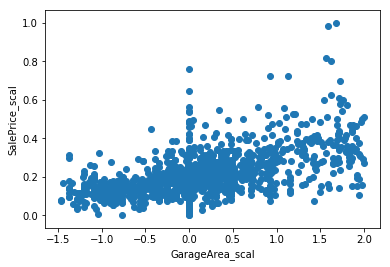

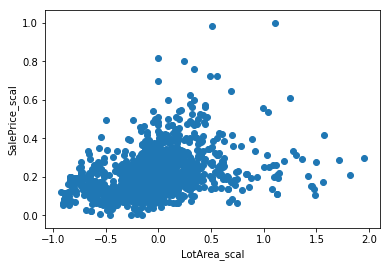

In [97]:
# Визуализация данных.Попытка рассмотреть, есть ли вообще какая-либо зависимость между ценой
# и выбранными нами свойствами. Корреляция присутствует. 
y_name = 'SalePrice_scal'


plt.scatter(train['GarageArea_scal_mean'],train[y_name])
plt.xlabel('GarageArea_scal')
plt.ylabel(y_name)
plt.show()

#indexes = rem_ind(train,'LotArea_scal')
#train.drop(indexes,inplace=True)
plt.scatter(train['LotArea_scal_mean'],train[y_name])
plt.xlabel('LotArea_scal')
plt.ylabel(y_name)
plt.show()


In [98]:
#### Построение модели на основе 'GarageArea_scal_mean','LotArea_mean','YearBuilt_scal'
features = ['GarageArea_scal_mean','LotArea_scal_mean','YearBuilt_scal'] # Данные для тренировки модели
kf = KFold(n_splits=5)
model = LinearRegression()
rmse_list = []
# кросс-валидация
for i,(train_ind,test_ind) in enumerate(kf.split(train)):
    x_train,x_test = train.loc[train_ind,features], train.loc[test_ind,features]
    y_train,y_test = train.loc[train_ind,['SalePrice_scal']], train.loc[test_ind,['SalePrice_scal']]
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print('rmse {}: {}'.format(i+1,rmse))
rmse_mean5 = np.mean(rmse_list)
print('mean rmse: '+str(rmse_mean5))
prediction = model.predict(test[features])
output = pd.DataFrame()
output['Id'] = test['Id']
maxim=train['SalePrice'].max()
minim=train['SalePrice'].min()
output['SalePrice'] = prediction*(maxim-minim)+minim
output.head()
output.to_csv('submission_5.csv', index = None)
values_kaggle=[]

rmse 1: 0.0706456062393823
rmse 2: 0.07551153214320816
rmse 3: 0.08899825805110068
rmse 4: 0.07303006452410293
rmse 5: 0.08508004985739331
mean rmse: 0.07865310216303747


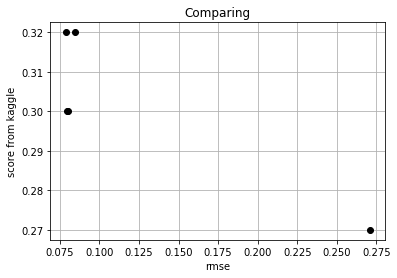

In [99]:
from_kaggle = [0.30,0.27,0.32,0.30,0.32]
rmse_itog = []
for n in range(1,6):
    eval('rmse_itog.append(rmse_mean{})'.format(n))
plt.plot(rmse_itog,from_kaggle,'ok')
plt.xlabel('rmse')
plt.ylabel('score from kaggle')
plt.title('Comparing')
plt.grid(True)
plt.show()


## Вывод
Несмотря на казалось бы хорошие результаты кросс-валидации 4 из 5 моделей переобучены.